In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA 

In [3]:
data=pd.read_csv("Netflix_stock_history.csv")
data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,0,0.0
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4870 non-null   object 
 1   Open          4870 non-null   float64
 2   High          4870 non-null   float64
 3   Low           4870 non-null   float64
 4   Close         4870 non-null   float64
 5   Volume        4870 non-null   int64  
 6   Dividends     4870 non-null   int64  
 7   Stock Splits  4870 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 304.5+ KB


In [6]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)

<Axes: xlabel='Date', ylabel='Close'>

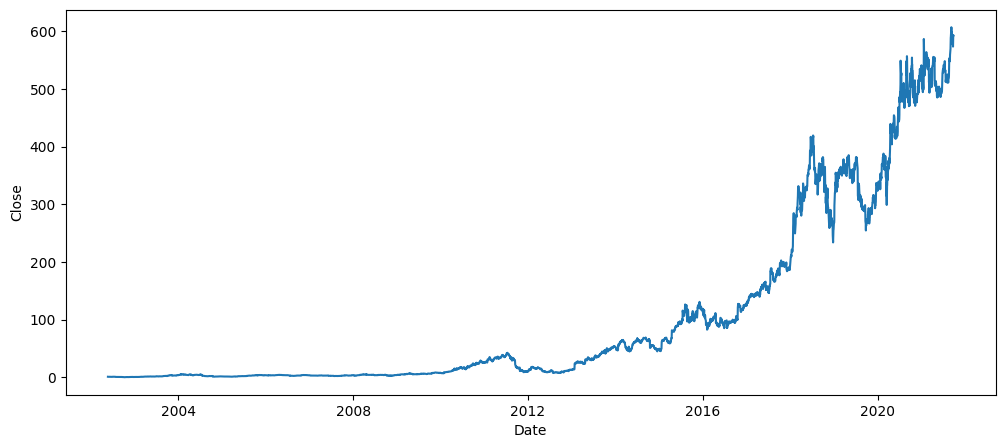

In [9]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Date",y="Close",data=data)

# Data Preprocessing

In [11]:
df=data[["Close"]].values

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [14]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range(sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [15]:
sequence_length=10

In [16]:
X,y=create_sequence(scaler_data,sequence_length)

In [24]:
X = X.reshape((X.shape[0], 1, X.shape[1]))
print(X.shape,y.shape)

(4860, 1, 10) (4860,)


# Model

In [25]:
model=Sequential()

In [26]:
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))

In [27]:
model.add(Dropout(0.2))
model.add(Dense(1))

In [28]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        12,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,251 (47.86 KB)

 Trainable params: 12,251 (47.86 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X,y,verbose=1,epochs=100,batch_size=32)

Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 0.0373
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.0016 
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.0015
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.0014
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.0013
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0013 
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.0013
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.0012 
Epoch 9/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.0012
Epoch 10/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.0012 
Epoch 11/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.0013 
Epoch 12/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.0010    
Epoch 13/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.0011
Epoch 14/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 15

# Model Evaluation

In [32]:
loss=model.evaluate(X,y)
print("Model loss :",loss)

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 6.6658e-05
Model loss : 0.0005500333500094712


# Prediction

In [33]:
predictions=model.predict(X)
predictions=scaler.fit_transform(predictions)
print(predictions[:10])

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
[[0.00131592]
 [0.00129991]
 [0.00131153]
 [0.00132256]
 [0.00129936]
 [0.00126986]
 [0.00119506]
 [0.00110753]
 [0.00103186]
 [0.00100861]]


In [34]:
actual_values=scaler.fit_transform(y.reshape(-1,1))

# Actual Values Vs Predicted Values

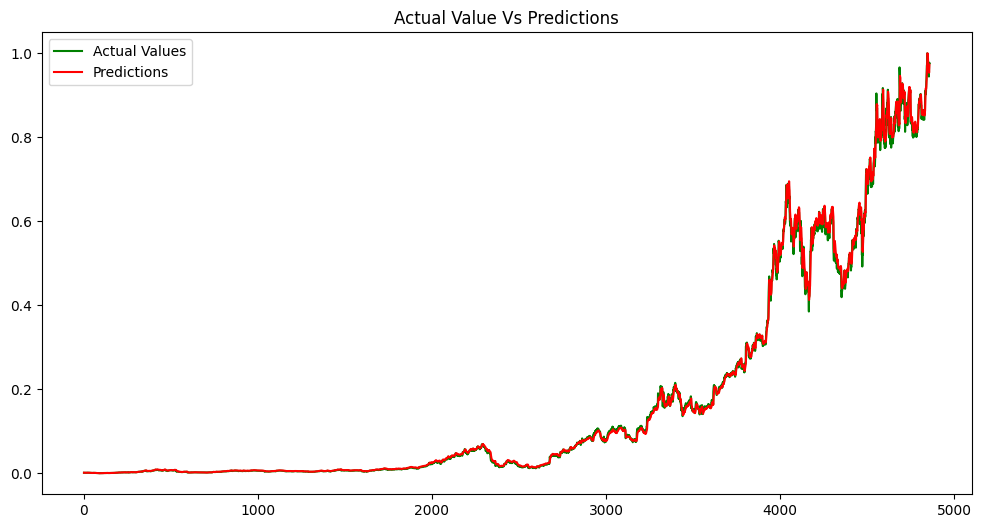

In [37]:
plt.figure(figsize=(12,6))
plt.plot(actual_values,label="Actual Values",color="green")
plt.plot(predictions,label="Predictions",color="red")
plt.legend()
plt.title("Actual Value Vs Predictions")
plt.show()